In [1]:
import pickle
from collections import defaultdict
from coatiLDM.constants import FIGURE_DATA_PATH
import smart_open
import numpy
import os
from coatiLDM.common.s3 import load_figure_file

In [3]:
data = load_figure_file('corr_stats.pkl',local_dir='./figure_data',filetype='pkl')

In [7]:
method_order = ['cond', 'flow', 'cg', 'cg_big', 'cfg', 'dflow']
method_order = ['Joint', 'FlowOT', 'CG (ω=10)', 'CG (ω=70)', 'CFG', 'D-Flow']

fig_data = defaultdict(list)
for meth in method_order:
    fig_data['Method'].append(meth)
    fig_data['hCAII'].append(data[meth]['stats']['hCAII'])
    fig_data['LogP/TPSA'].append(data[meth]['stats']['logp_tpsa']['logp'])
    fig_data['TPSA/LogP'].append(data[meth]['stats']['logp_tpsa']['tpsa'])
    fig_data['LogP'].append(data[meth]['stats']['LogP'])
    fig_data['TPSA'].append(data[meth]['stats']['TPSA'])


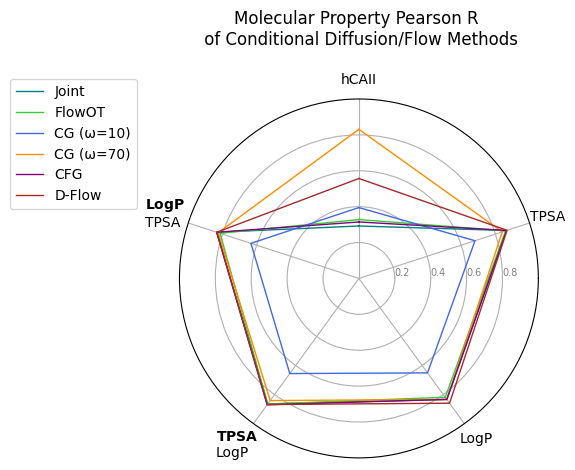

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
colors = ['teal', 'limegreen', 'royalblue', 'darkorange', 'purple', 'brown', 'black']
# Input the data from your table into a DataFrame


df = pd.DataFrame(fig_data)

# We have 5 metrics, so we will plot each one on its own axis
categories = list(df)[1:]
N = len(categories)
categories = list(df)[1:]
formatted_categories = []
for cat in categories:
    if cat == 'LogP/TPSA':
        # Use LaTeX-style formatting for partial bold text
        formatted_categories.append(r'$\bf{LogP}$'+'\nTPSA')
    elif cat == 'TPSA/LogP':
        # Use LaTeX-style formatting for partial bold text
        formatted_categories.append(r'$\bf{TPSA}$'+'\nLogP')
    else:
        formatted_categories.append(cat)
# Compute the angle each category will be located on the circle, and rotate by pi/2
offset = pi / 2  # 90 degree rotation
angles = [(n / float(N) * 2 * pi + offset) % (2 * pi) for n in range(N)]
angles += angles[:1]  # complete the loop

# Initialize the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
#plt.xticks(angles[:-1], formatted_categories)
#excluded_labels = ['LogP/TPSA', 'TPSA/LogP']
adjusted_labels = ["" if cat in ['LogP/TPSA', 'TPSA/LogP'] else cat for cat in categories]
plt.xticks(angles[:-1], adjusted_labels)

ax.text((.925) * pi , 1.225, r'$\bf{LogP}$'+'\nTPSA', horizontalalignment='left', size=10, color='black', transform=ax.transData)
ax.text((1.285) * pi , 1.275, r'$\bf{TPSA}$'+'\nLogP', horizontalalignment='left', size=10, color='black', transform=ax.transData)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
plt.ylim(0,1)

# Plot each method in the DataFrame
for index, row in df.iterrows():
    values = row.drop('Method').values.flatten().tolist()
    values += values[:1]  # repeat the first value to close the circle
    ax.plot(angles, values, linewidth=1, linestyle='solid',color=colors[index], label=row['Method'])

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(-.1, 1.075))
plt.title("Molecular Property Pearson R \n of Conditional Diffusion/Flow Methods", pad=20)
plt.tight_layout()

#plt.savefig('correlations.svg')
# Show the plot
plt.show()
